# Taller

# 1
Del conjunto de datos de Temperatura, realice la selección de una provincia y realice la estimación de la densidad. Para esta estimación considere:

### a. Tabla de frecuencias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [4]:
df = pd.read_excel("data\\Temperaturas.xlsx", sheet_name = 'Hoja3')

In [5]:
df.head(2)

,ano1,mes2,dia3,fecha4,alava5,albacete6,alicante7,almeria8,avila9,badajoz10,...,sevilla47,soria48,tarragona49,teruel50,toledo51,valladolid52,valencia53,vizcaya54,zamora55,zaragoza56
0,1990,1,1,1990-01-01,25,22,14,15,29,19,...,18,29,20,23,25,27,18,20,25,26
1,1990,1,2,1990-01-02,26,25,14,14,33,21,...,20,30,16,23,27,29,17,18,31,22


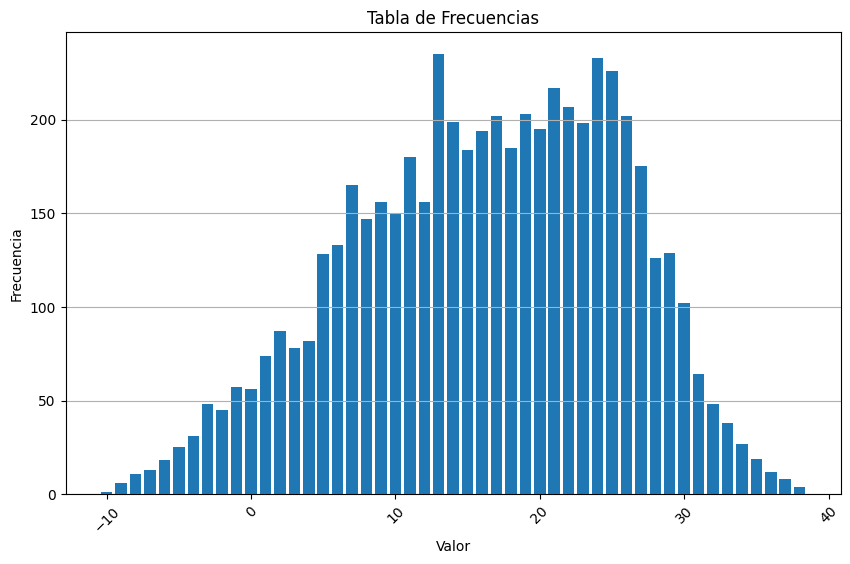

In [6]:
tabla_frecuencias = df['alava5'].value_counts()

# Convertir la serie de frecuencias en un DataFrame para facilitar el trazado
tabla_frecuencias_df = tabla_frecuencias.reset_index()
tabla_frecuencias_df.columns = ['Valor', 'Frecuencia']

# Trazar el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(tabla_frecuencias_df['Valor'], tabla_frecuencias_df['Frecuencia'])
plt.xlabel('Valor') 
plt.ylabel('Frecuencia')  
plt.title('Tabla de Frecuencias')  
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.show()

In [7]:
tabla_frecuencias_df = tabla_frecuencias.reset_index()
tabla_frecuencias_df.columns = ['Valor', 'Frecuencia']

In [8]:
tabla_frecuencias_df

,Valor,Frecuencia
0,13,235
1,24,233
2,25,226
3,21,217
4,22,207
5,19,203
6,17,202
7,26,202
8,14,199
9,23,198


### b Estimación utilizando al menos 2 Kernels. Al variar el ancho de banda, ¿qué puede concluir de su efecto al estimar la densidad?

In [9]:
from sklearn.neighbors import KernelDensity

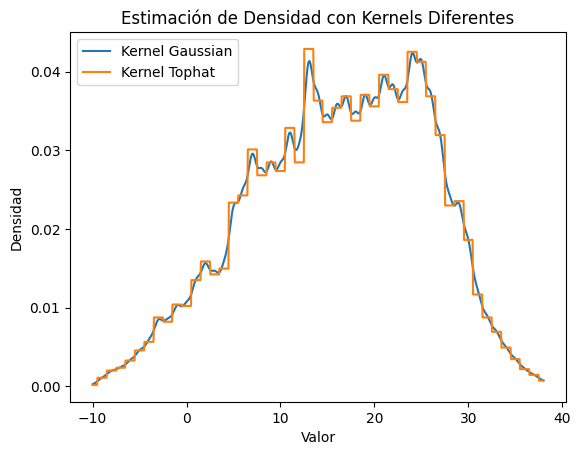

In [10]:
data = df['alava5'].values

x = np.linspace(data.min(), data.max(), 1000)

kernels = ['gaussian', 'tophat'] ##--, 'epanechnikov'
for kernel in kernels:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(data[:, None])
    log_dens = kde.score_samples(x[:, None])
    plt.plot(x, np.exp(log_dens), label=f'Kernel {kernel.capitalize()}')

plt.title('Estimación de Densidad con Kernels Diferentes')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

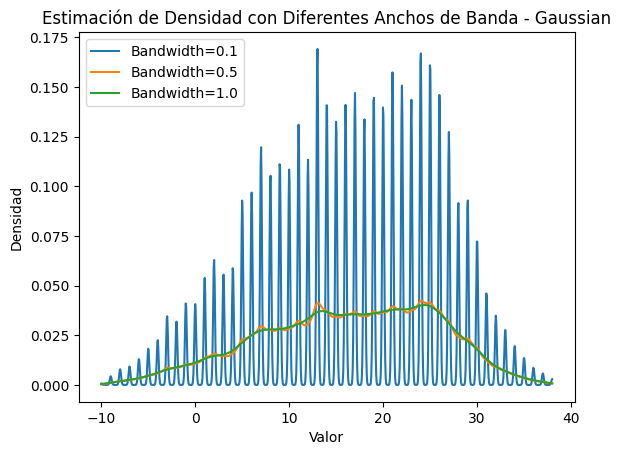

In [11]:
bandwidths = [0.1, 0.5, 1.0]

# Estimar la densidad utilizando Kernel Density Estimation (KDE) con diferentes valores de bandwidth
for bandwidth in bandwidths:
    kdeG = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(data[:, None])
    log_dens = kdeG.score_samples(x[:, None])
    plt.plot(x, np.exp(log_dens), label=f'Bandwidth={bandwidth}')

plt.title('Estimación de Densidad con Diferentes Anchos de Banda - Gaussian')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

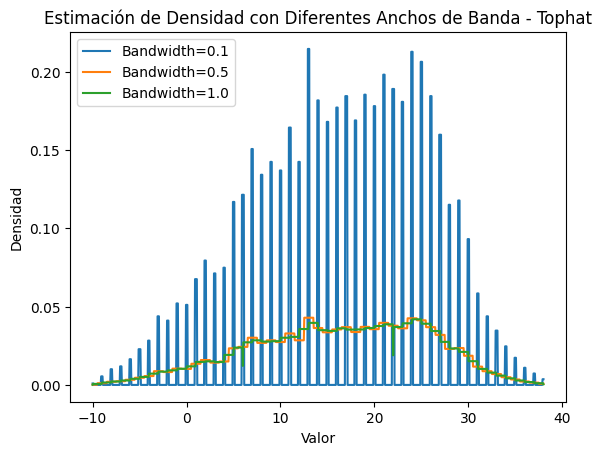

In [12]:
bandwidths = [0.1, 0.5, 1.0]

# Estimar la densidad utilizando Kernel Density Estimation (KDE) con diferentes valores de bandwidth
for bandwidth in bandwidths:
    kdeT = KernelDensity(kernel='tophat', bandwidth=bandwidth).fit(data[:, None])
    log_dens = kdeT.score_samples(x[:, None])
    plt.plot(x, np.exp(log_dens), label=f'Bandwidth={bandwidth}')

plt.title('Estimación de Densidad con Diferentes Anchos de Banda - Tophat')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Respuesta: 
Un ancho de banda más pequeño producirá una estimación de densidad más ajustada y sensible a los detalles finos de los datos, mientras que un ancho de banda más grande resultará en una estimación de densidad más suave y generalizada. 

El kernel "tophat" tiene una particularidad, ya que la densidad estimada seguirá siendo cero fuera del ancho definido por el kernel "tophat"

# C

In [13]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

In [14]:
data = df['alava5'].values

In [16]:
# Calculo la media, mediana y moda de las temperaturas
media = df['alava5'].mean()
mediana = df['alava5'].median()
moda = stats.mode(df['alava5'])[0]

print("Media de todas las columnas:", media)
print("Moda de todas las columnas:", moda)
print("Mediana de todas las columnas:", mediana)

Media de todas las columnas: 16.265741923708706
Moda de todas las columnas: 13
Mediana de todas las columnas: 17.0


In [17]:
tabla_frecuencias_df##.columns## = ['Valor', 'Frecuencia']

,Valor,Frecuencia
0,13,235
1,24,233
2,25,226
3,21,217
4,22,207
5,19,203
6,17,202
7,26,202
8,14,199
9,23,198


In [18]:
valores = tabla_frecuencias_df.index
frecuencias = tabla_frecuencias_df.values

In [19]:
x = np.linspace(data.min(), data.max(), 1000)
kernels = ['gaussian', 'tophat']

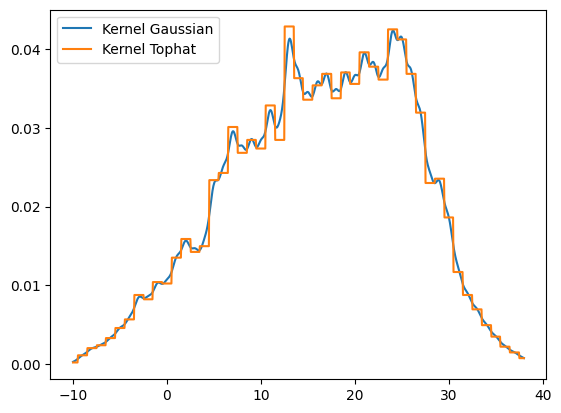

In [20]:
for kernel in kernels:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(data[:, None])
    log_dens = kde.score_samples(x[:, None])
    plt.plot(x, np.exp(log_dens), label=f'Kernel {kernel.capitalize()}')
    plt.legend()

In [21]:
prob_media = np.exp(kde.score_samples(np.array([[media]])))[0]
prob_mediana = np.exp(kde.score_samples(np.array([[mediana]])))[0]
prob_moda = np.exp(kde.score_samples(np.array([[moda]])))[0]

In [22]:
print("Probabilidad de obtener un valor menor o igual a la media:", prob_media)
print("Probabilidad de obtener un valor menor o igual a la mediana:", prob_mediana)
print("Probabilidad de obtener un valor menor o igual a la moda:", prob_moda)


Probabilidad de obtener un valor menor o igual a la media: 0.0354079211534952
Probabilidad de obtener un valor menor o igual a la mediana: 0.03686804161343289
Probabilidad de obtener un valor menor o igual a la moda: 0.04289103851067717


In [23]:
# Calculo la probabilidad esperada bajo una distribución normal
std_dev = df['alava5'].std()
prob_media_esperada = norm.cdf(media, loc=media, scale=std_dev)
prob_mediana_esperada = norm.cdf(mediana, loc=media, scale=std_dev)
prob_moda_esperada = norm.cdf(moda, loc=media, scale=std_dev)

In [24]:
print("Probabilidad media esperada:", prob_media_esperada)
print("Probabilidad mediana esperada:", prob_mediana_esperada)
print("Probabilidad moda esperada:", prob_moda_esperada)

Probabilidad media esperada: 0.5
Probabilidad mediana esperada: 0.531523244215931
Probabilidad moda esperada: 0.3624908415426979


In [25]:
# Comparo las probabilidades calculadas con las esperadas
sesgo_media = prob_media - prob_media_esperada
sesgo_mediana = prob_mediana - prob_mediana_esperada
sesgo_moda = prob_moda - prob_moda_esperada

print("Sesgo en la media:", sesgo_media)
print("Sesgo en la mediana:", sesgo_mediana)
print("Sesgo en la moda:", sesgo_moda)

Sesgo en la media: -0.4645920788465048
Sesgo en la mediana: -0.4946552026024981
Sesgo en la moda: -0.31959980303202074


Respuesta Sesgos: Se encuentra sesgo en los datos ya que las diferencias presentandas son menores a las medidas calculadas anteriormente.

# 2

Utilizando la densidad estimada en el punto anterior, realice la simulación de 1000 datos provenientes de la distribución de la provincia seleccionada, verifique visualmente si los datos simulados tienen un comportamiento distribucional similar a los datos reales. Ahora, repita el proceso de simulación 10000 veces, en donde en cada iteración va a realizar la estimación del promedio de la temperatura, realice un histograma de dichos promedios, ¿qué observa? ¿Qué propiedad estadística soporta los hallazgos encontrados?

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm
from scipy.stats import shapiro

Media de todas las columnas: 16.265741923708706
Moda de todas las columnas: 13
Mediana de todas las columnas: 17.0


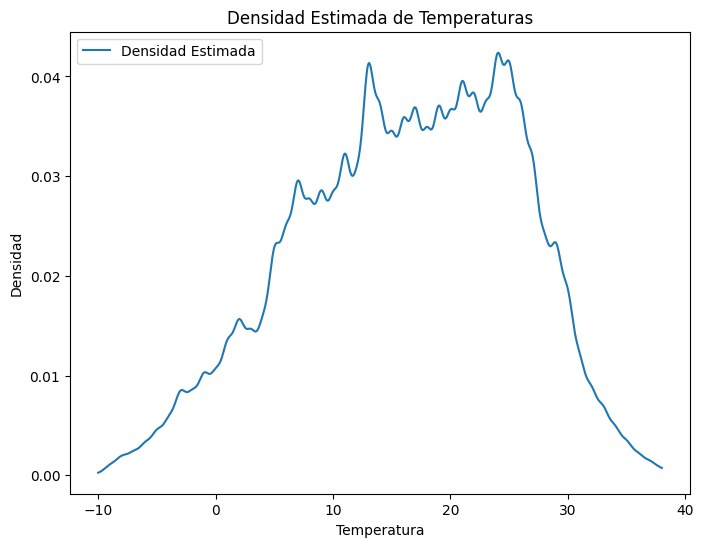

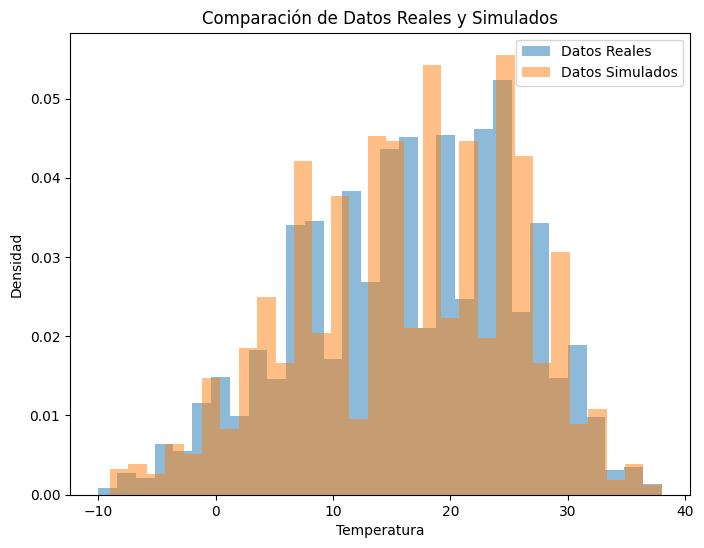

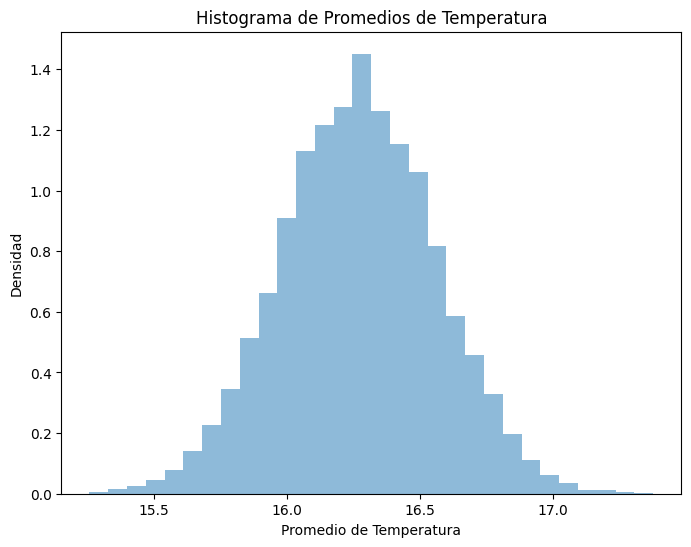

In [26]:
data = df['alava5'].values

# Calculo la media, mediana y moda de las temperaturas
media = df['alava5'].mean()
mediana = df['alava5'].median()
moda = stats.mode(df['alava5'])[0]

print("Media de todas las columnas:", media)
print("Moda de todas las columnas:", moda)
print("Mediana de todas las columnas:", mediana)

# Estimación de la densidad
x = np.linspace(data.min(), data.max(), 1000)
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data[:, None])
log_dens = kde.score_samples(x[:, None])
densidad_estimada = np.exp(log_dens)

# Visualización de la densidad estimada
plt.figure(figsize=(8, 6))
plt.plot(x, densidad_estimada, label='Densidad Estimada')
plt.xlabel('Temperatura')
plt.ylabel('Densidad')
plt.title('Densidad Estimada de Temperaturas')
plt.legend()
plt.show()

# Simulación de 1000 datos provenientes de la distribución df['alava5']
datos_simulados = np.random.choice(data, size=1000)

# Visualización de los datos simulados y datos reales
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Datos Reales')
plt.hist(datos_simulados, bins=30, density=True, alpha=0.5, label='Datos Simulados')
plt.xlabel('Temperatura')
plt.ylabel('Densidad')
plt.title('Comparación de Datos Reales y Simulados')
plt.legend()
plt.show()

# Simulación de 10000 estimaciones del promedio de temperatura
promedios = []
for _ in range(10000):
    datos_simulados_iter = np.random.choice(data, size=1000)
    promedio_iter = np.mean(datos_simulados_iter)
    promedios.append(promedio_iter)

# Histograma de los promedios
plt.figure(figsize=(8, 6))
plt.hist(promedios, bins=30, density=True, alpha=0.5)
plt.xlabel('Promedio de Temperatura')
plt.ylabel('Densidad')
plt.title('Histograma de Promedios de Temperatura')
plt.show()


¿qué observa? ¿Qué propiedad estadística soporta los hallazgos encontrados?.
Procedimiento de apoyo para validar si tiene distribucion normal, ya que la grafica "Pareciera" que tiene dicha distribución.

In [27]:
# Prueba de normalidad de Shapiro-Wilk
stat, p_valor = shapiro(data)

C:\Users\JohanStivenPaezBermu\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [28]:
print("Estadístico de prueba:", stat)
print("Valor p:", p_valor)

Estadístico de prueba: 0.9848129153251648
Valor p: 8.013059748617785e-24


In [29]:
nivel_significancia = 0.05
if p_valor > nivel_significancia:
    print("No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal.")

Se rechaza la hipótesis nula: los datos no siguen una distribución normal.


In [33]:
# Ejecutar la prueba de Anderson-Darling
resultado = stats.anderson(data, dist='norm')

# Mostrar el resultado
print("Estadístico de Anderson-Darling:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia asociados:", resultado.significance_level)

Estadístico de Anderson-Darling: 23.980539948302976
Valores críticos: [0.576 0.656 0.786 0.917 1.091]
Niveles de significancia asociados: [15.  10.   5.   2.5  1. ]


Conclusion, no tiene distribuacion normal 

### Realizar la prueba de Mann-Whitney U

In [45]:
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

In [41]:
grupo1 = datos_simulados
grupo2 = data

In [43]:
stat, p_valor = mannwhitneyu(grupo1, grupo2)

In [46]:
print("Prueba U de Mann-Whitney:", stat)
print("Valor p:", p_valor)

Prueba U de Mann-Whitney: 2755520.5
Valor p: 0.7682465504297373


Conclusión: A nivel de prueba p.value, el valor p obtenido es 0.7682465504297373. Con una hipótesis nula (que los dos grupos tienen la misma distribución) fuera verdadera. En este caso, un valor p de 0.7682 indica que no hay suficiente evidencia para rechazar la hipótesis nula a un nivel de significancia del 5%. Por lo tanto, no puedes concluir que hay una diferencia significativa entre los dos grupos basándote en este valor p.

# 5.

Cree un modelo de regresión donde la variable explicativa (Y) es la provincia que usted eligió, y las variables regresoras (X) son las demás provincias del conjunto de datos. Utilice 3 aproximas robustas y/o no paramétricas para estimar el modelo de regresión, e identifique cuales provincias son relevantes para explicar la provincia elegida (presente evidencia estadística para justificar su respuesta).

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import median_absolute_error, r2_score
import numpy as np

In [35]:
df = pd.read_excel("data\\Temperaturas.xlsx", sheet_name = 'Hoja3')

In [36]:
Y = df['alava5']
columns_to_drop = ['alava5', 'ano1', 'mes2', 'dia3', 'fecha4']
X = df.drop(columns=columns_to_drop, inplace=False)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
# Predicciones con el modelo
y_pred = tree_model.predict(X_test) 

In [40]:
# Calculo medidas robustas y/o no paramétricas para evaluar el modelo
mae = median_absolute_error(y_test, y_pred)
medae = np.median(np.abs(y_test - y_pred))
r2_nonparametric = r2_score(rankdata(y_test), rankdata(y_pred))

In [41]:
print("Error Absoluto Mediano (MAE):", mae)
print("Error Cuantil Mediano (MedAE):", medae)
print("R^2 No paramétrico:", r2_nonparametric)

Error Absoluto Mediano (MAE): 1.0
Error Cuantil Mediano (MedAE): 1.0
R^2 No paramétrico: 0.949911640681823


Los resultados anteriores. valores indican que el modelo tiene un buen rendimiento en la predicción de la variable dependiente ('alava5'), ya que tiene un MAE y MedAE bajos, lo que significa que las predicciones del modelo se encuentran cerca de los valores reales. 

Además, el R^2 de casi 0.95 sugiere que una gran parte de la variabilidad en 'alava5' se puede explicar por las variables independientes, lo que indica un buen ajuste del modelo.

#### Identifique cuales provincias son relevantes para explicar la provincia elegida (presente evidencia estadística para justificar su respuesta).

In [52]:
from scipy.stats import f_oneway
provincias_relevantes = []

# Prueba ANOVA para cada provincia
for column in X.columns:
    p_value = f_oneway(df[column], df['alava5'])[1]
    print(f"p-value para {column}: {p_value}")

    if p_value < 0.05:
        provincias_relevantes.append(column)

# Provincias importantes 
print("\nProvincias importantes para explicar 'alava5':")
print(provincias_relevantes)

p-value para albacete6: 2.0976318140591613e-108
p-value para alicante7: 0.0
p-value para almeria8: 0.0
p-value para avila9: 0.005996470712900926
p-value para badajoz10: 0.0
p-value para baleares11: 1.2771352808854227e-287
p-value para barcelona12: 6.275332802207917e-114
p-value para burgos13: 0.0007716653970291297
p-value para caceres14: 3.0492727107525438e-192
p-value para cadiz15: 2.385657183003995e-272
p-value para castellon16: 3.48802876e-316
p-value para ceuta17: 2.580221275707848e-199
p-value para cordoba18: 0.0
p-value para coruña19: 2.6640660550737696e-06
p-value para creal20: 1.3274153198001233e-176
p-value para cuenca21: 5.595655114338865e-36
p-value para gerona22: 3.851005878364052e-148
p-value para granada23: 3.0333511783565724e-230
p-value para guadalajara24: 1.626708690443418e-07
p-value para guipuzcoa25: 8.159976303999144e-09
p-value para huelva26: 0.0
p-value para huesca27: 1.8289250356921584e-150
p-value para jaen28: 4.00342175059193e-159
p-value para leon29: 3.4773069

In [57]:
from scipy.stats import mannwhitneyu

alfa = 0.05

# Lista para almacenar las provincias aceptadas junto con sus valores p
provincias_aceptadas = []
provincias_rechazadas = []

# Prueba U de Mann-Whitney para cada provincia
for column in X.columns:
    statistic, p_value = mannwhitneyu(df[column], df['alava5'], alternative='two-sided')
    
    # Si el valor p es menor que alfa, se acepta la provincia y se agrega a la lista
    if p_value < alfa:
        provincias_aceptadas.append((column, p_value))
    
     # Si el valor p es mayor o igual que alfa, se rechaza la provincia y se agrega a la lista
    if p_value >= alfa:
        provincias_rechazadas.append((column, p_value))

# provincias aceptadas
print("Provincias aceptadas:")
for provincia, p_value in provincias_aceptadas:
    print(f"{provincia}: Valor p = {p_value:.9f}")

# provincias rechazadas
print("Provincias rechazadas:")
for provincia, p_value in provincias_rechazadas:
    print(f"{provincia}: Valor p = {p_value:.9f}")


Provincias aceptadas:
albacete6: Valor p = 0.000000000
alicante7: Valor p = 0.000000000
almeria8: Valor p = 0.000000000
avila9: Valor p = 0.000689693
badajoz10: Valor p = 0.000000000
baleares11: Valor p = 0.000000000
barcelona12: Valor p = 0.000000000
burgos13: Valor p = 0.000009366
caceres14: Valor p = 0.000000000
cadiz15: Valor p = 0.000000000
castellon16: Valor p = 0.000000000
ceuta17: Valor p = 0.000000000
cordoba18: Valor p = 0.000000000
coruña19: Valor p = 0.000000000
creal20: Valor p = 0.000000000
cuenca21: Valor p = 0.000000000
gerona22: Valor p = 0.000000000
granada23: Valor p = 0.000000000
guadalajara24: Valor p = 0.000010000
guipuzcoa25: Valor p = 0.000645954
huelva26: Valor p = 0.000000000
huesca27: Valor p = 0.000000000
jaen28: Valor p = 0.000000000
leon29: Valor p = 0.000000567
rioja30: Valor p = 0.000000000
lleida32: Valor p = 0.000000000
madrid33: Valor p = 0.000000000
malaga34: Valor p = 0.000000000
melilla35: Valor p = 0.000000000
murcia36: Valor p = 0.000000000
orens

Se ejecutan un par de prueba ANOVA y U de Mann-Whitney, y se evidencian que varias Provincias pueden explicar la provincia de alava5, como son el caso de 'albacete6', 'alicante7', 'almeria8', 'avila9' por mencionar algunas.

Igualmente se tienen algunas provincias que fueron rechazadas como es el caso de lugo31.

# 8

Utilice el método de rangos para identificar que provincias del conjunto de datos son distintas a las elegidas

In [20]:
import pandas as pd
from scipy.stats import ranksums

alpha = 0.05  # Nivel de significancia del 5%

aceptados = []
no_aceptados = []

df = pd.read_excel("data\\Temperaturas.xlsx", sheet_name = 'Hoja3')

# provincia de referencia
provincia_referencia = df['alava5']

# Depuro los datos del DF, para los datos no incluidos en el analisis.
columns_to_drop = ['alava5', 'ano1', 'mes2', 'dia3', 'fecha4']
dfB = df.drop(columns=columns_to_drop, inplace=False)

# Diccionario para almacenar los estadísticos de prueba y los valores p
resultados = {}


In [24]:
# Comparo cada una de las provicias con la provincia de referencia "alava5"
for columna in dfB.columns:
    #if columna != 'alava5':  # Saltar la columna de referencia
    provincia_actual = df[columna]
    
    # Estadístico de prueba y el valor p utilizando ranksums de scipy
    statistic, p_value = ranksums(provincia_referencia, dfB[columna])
    
    # Almaceno los resultados en el diccionario
    resultados[columna] = {'estadistico': statistic, 'valor_p': p_value}

    # Verifico si el p-value es aceptable o no
    if p_value <= alpha:
        aceptados.append(columna)
    else:
        no_aceptados.append(columna)


In [25]:
# Imprimir los resultados
print("P-values aceptados:")
print(aceptados)
print("\nP-values no aceptados:")
print(no_aceptados)

P-values aceptados:
['albacete6', 'alicante7', 'almeria8', 'avila9', 'badajoz10', 'baleares11', 'barcelona12', 'burgos13', 'caceres14', 'cadiz15', 'castellon16', 'ceuta17', 'cordoba18', 'coruña19', 'creal20', 'cuenca21', 'gerona22', 'granada23', 'guadalajara24', 'guipuzcoa25', 'huelva26', 'huesca27', 'jaen28', 'leon29', 'rioja30', 'lleida32', 'madrid33', 'malaga34', 'melilla35', 'murcia36', 'orense37', 'asturias38', 'palencia39', 'laspalmas40', 'navarra41', 'pontevedra42', 'salamanca43', 'tenerife44', 'cantabria45', 'sevilla47', 'tarragona49', 'teruel50', 'toledo51', 'valladolid52', 'valencia53', 'vizcaya54', 'zamora55', 'zaragoza56', 'albacete6', 'alicante7', 'almeria8', 'avila9', 'badajoz10', 'baleares11', 'barcelona12', 'burgos13', 'caceres14', 'cadiz15', 'castellon16', 'ceuta17', 'cordoba18', 'coruña19', 'creal20', 'cuenca21', 'gerona22', 'granada23', 'guadalajara24', 'guipuzcoa25', 'huelva26', 'huesca27', 'jaen28', 'leon29', 'rioja30', 'lleida32', 'madrid33', 'malaga34', 'melilla3

In [26]:
# Los resultados ordenados por el valor p
print("Resultados de la prueba de rangos de Wilcoxon-Mann-Whitney:\n")
for provincia, resultado in sorted(resultados.items(), key=lambda x: x[1]['valor_p']):
    print(f"Provincia: {provincia}, Estadístico: {resultado['estadistico']}, Valor p: {resultado['valor_p']}")

Resultados de la prueba de rangos de Wilcoxon-Mann-Whitney:

Provincia: alicante7, Estadístico: 42.971954932072045, Valor p: 0.0
Provincia: almeria8, Estadístico: 42.87679896022227, Valor p: 0.0
Provincia: badajoz10, Estadístico: 38.64222987268287, Valor p: 0.0
Provincia: cordoba18, Estadístico: 44.07610362767529, Valor p: 0.0
Provincia: huelva26, Estadístico: 43.997988217824435, Valor p: 0.0
Provincia: malaga34, Estadístico: 41.76125365271331, Valor p: 0.0
Provincia: melilla35, Estadístico: 37.96242831402376, Valor p: 0.0
Provincia: murcia36, Estadístico: 47.91284217846771, Valor p: 0.0
Provincia: laspalmas40, Estadístico: 53.69759206678315, Valor p: 0.0
Provincia: tenerife44, Estadístico: 54.77324319308214, Valor p: 0.0
Provincia: sevilla47, Estadístico: 48.94597494344384, Valor p: 0.0
Provincia: tarragona49, Estadístico: 38.26841254681938, Valor p: 0.0
Provincia: valencia53, Estadístico: 40.55214077236421, Valor p: 0.0
Provincia: castellon16, Estadístico: 36.37345252831059, Valor p:

# 9

In [27]:
import pandas as pd
from scipy.stats import ranksums

# Supongamos que dfB es tu DataFrame y 'alava5' es la columna que contiene los datos para la provincia de referencia
# Supongamos también que tienes un umbral alpha para determinar qué p-values son aceptables

alpha = 0.05  # Por ejemplo, un nivel de significancia del 5%

# Obtener los datos para la provincia de referencia
provincia_referencia = df['alava5']

# Crear una lista para almacenar los resultados de la prueba de rangos para cada columna
resultados = []

# Iterar sobre las columnas del DataFrame dfB para comparar cada una con la provincia de referencia
for columna in dfB.columns:
    # Calcular el estadístico de prueba y el valor p utilizando ranksums de scipy
    statistic, p_value = ranksums(provincia_referencia, dfB[columna])
    
    # Agregar los resultados a la lista
    resultados.append((columna, p_value))

# Ordenar la lista de resultados de acuerdo con los valores p
resultados_ordenados = sorted(resultados, key=lambda x: x[1])

# Imprimir los resultados ordenados y mostrar las hipótesis aceptadas y no aceptadas
print("Resultados de la prueba de rangos de Wilcoxon-Mann-Whitney:")
for provincia, p_value in resultados_ordenados:
    # Verificar si el p-value es aceptable o no
    if p_value <= alpha:
        hipotesis = "Aceptada"
    else:
        hipotesis = "No aceptada"
    
    print(f"Provincia: {provincia}, Valor p: {p_value}, Hipótesis: {hipotesis}")


Resultados de la prueba de rangos de Wilcoxon-Mann-Whitney:
Provincia: alicante7, Valor p: 0.0, Hipótesis: Aceptada
Provincia: almeria8, Valor p: 0.0, Hipótesis: Aceptada
Provincia: badajoz10, Valor p: 0.0, Hipótesis: Aceptada
Provincia: cordoba18, Valor p: 0.0, Hipótesis: Aceptada
Provincia: huelva26, Valor p: 0.0, Hipótesis: Aceptada
Provincia: malaga34, Valor p: 0.0, Hipótesis: Aceptada
Provincia: melilla35, Valor p: 0.0, Hipótesis: Aceptada
Provincia: murcia36, Valor p: 0.0, Hipótesis: Aceptada
Provincia: laspalmas40, Valor p: 0.0, Hipótesis: Aceptada
Provincia: tenerife44, Valor p: 0.0, Hipótesis: Aceptada
Provincia: sevilla47, Valor p: 0.0, Hipótesis: Aceptada
Provincia: tarragona49, Valor p: 0.0, Hipótesis: Aceptada
Provincia: valencia53, Valor p: 0.0, Hipótesis: Aceptada
Provincia: castellon16, Valor p: 1.1192765136956294e-289, Hipótesis: Aceptada
Provincia: baleares11, Valor p: 5.751551595749723e-263, Hipótesis: Aceptada
Provincia: cadiz15, Valor p: 7.378094294693877e-250, Hip